# 지역별 도서 대출 수

In [481]:
!pip install koreanize-matplotlib

import koreanize_matplotlib

In [482]:
# 구글 드라이브와 연동
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [483]:
import pandas as pd

# 지역별 도서 대출 수 (2022.01~05)
file_path = '/content/drive/MyDrive/bigdata_processing/지역별_도서_대출_수.csv'
df = pd.read_csv(file_path, encoding='utf-8')
df

,월,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,합계
0,1월,2416122,657623,578205,387130,231657,297452,210335,216464,3551797,206332,214415,387931,191199,230191,404976,633240,163884,10978953
1,2월,2101437,555337,489198,339060,201234,238150,183034,195021,3306579,180208,158257,328690,180417,193280,352435,526686,141915,9670938
2,3월,2324436,603978,530220,358794,211297,268950,198683,193148,3411516,182693,183714,353305,196776,216331,370998,547141,145756,10297736
3,4월,2206682,597172,513308,342656,207941,260514,161703,174087,3263590,182810,157633,342153,195313,219834,367276,542052,130859,9865583
4,5월,2022531,562069,489610,317549,196921,248177,152280,169920,3033461,159736,164709,318730,198123,181516,344051,478580,138185,9176148


In [484]:
print(df.columns)

Index(['월', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북',
       '충남', '전북', '전남', '경북', '경남', '제주', '합계'],
      dtype='object')


## '월', '합계' 열 삭제 및 월별 합계 계산

In [485]:
# 첫 열('월'), 마지막 열('합계') 삭제
df = df.drop(columns=['월','합계'])  # 없는 열은 무시)

# 열별 합계 계산
total_row = df.sum(axis=0)

# 월별 합계를 나타내는 5번째 행만 남기기
df = df.iloc[[4]].reset_index(drop=True)

# 결과 확인
print(df)

        서울      부산      대구      인천      광주      대전      울산      세종       경기  \
0  2022531  562069  489610  317549  196921  248177  152280  169920  3033461   

       강원      충북      충남      전북      전남      경북      경남      제주  
0  159736  164709  318730  198123  181516  344051  478580  138185  


## 시도명 전처리 : 현재 행정구역명으로 변경

In [486]:
# 새로운 열 이름 리스트
new_columns = ['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시',
               '대전광역시', '울산광역시', '세종특별자치시', '경기도', '강원특별자치도',
               '충청북도', '충청남도', '전북특별자치도', '전라남도', '경상북도',
               '경상남도', '제주특별자치도']


# 열 이름 변경
df.columns = new_columns

# 결과 확인
print(df)

     서울특별시   부산광역시   대구광역시   인천광역시   광주광역시   대전광역시   울산광역시  세종특별자치시      경기도  \
0  2022531  562069  489610  317549  196921  248177  152280   169920  3033461   

   강원특별자치도    충청북도    충청남도  전북특별자치도    전라남도    경상북도    경상남도  제주특별자치도  
0   159736  164709  318730   198123  181516  344051  478580   138185  


## 지도에 시각화 하기 위해 Wide Format -> Long Format 변환

In [487]:
# Wide Format -> Long Format 변환
df_long = df.melt(var_name='지역', value_name='대출수')

# 대출수 기준으로 내림차순 정렬
df_long = df_long.sort_values(by='대출수', ascending=False).reset_index(drop=True)

# 결과 확인
print(df_long)

         지역      대출수
0       경기도  3033461
1     서울특별시  2022531
2     부산광역시   562069
3     대구광역시   489610
4      경상남도   478580
5      경상북도   344051
6      충청남도   318730
7     인천광역시   317549
8     대전광역시   248177
9   전북특별자치도   198123
10    광주광역시   196921
11     전라남도   181516
12  세종특별자치시   169920
13     충청북도   164709
14  강원특별자치도   159736
15    울산광역시   152280
16  제주특별자치도   138185


In [488]:
import sys
import matplotlib.pyplot as plt

# Google Colab 환경에서 실행 중인지 확인
if 'google.colab' in sys.modules:
    # debconf를 Noninteractive 모드로 설정
    !echo 'debconf debconf/frontend select Noninteractive' | \
    debconf-set-selections

    # fonts-nanum 패키지를 설치
    !sudo apt-get -qq -y install fonts-nanum

    # Matplotlib의 폰트 매니저 가져오기
    import matplotlib.font_manager as fm

    # 나눔 폰트의 시스템 경로 찾기
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])

    # 찾은 각 나눔 폰트를 Matplotlib 폰트 매니저에 추가
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

plt.rcParams['font.family'] = 'NanumGothic'
print(plt.rcParams['font.family'], plt.rcParams['font.size']) # 폰트확인

['NanumGothic'] 12.0


['NanumGothic'] 12.0


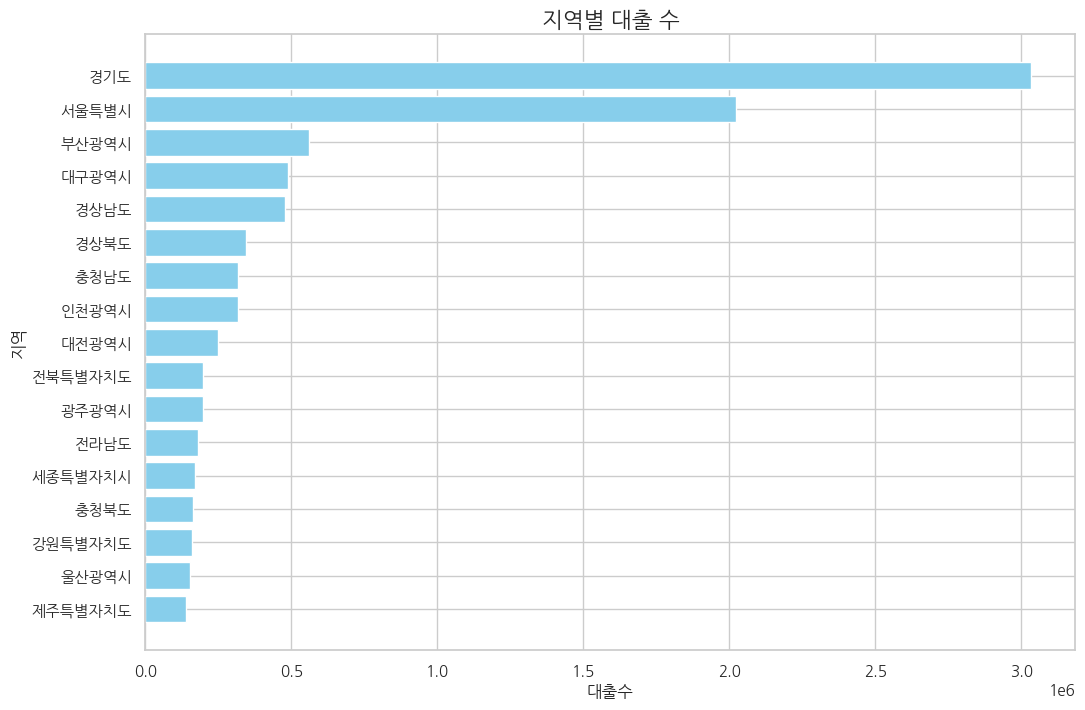

In [489]:
# matplotlib 라이브러리를 불러옵니다.
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

plt.rcParams['font.family'] = 'NanumGothic'
print(plt.rcParams['font.family'], plt.rcParams['font.size'])   # 폰트확인

# 데이터 정렬
df_long_sorted = df_long.sort_values(by='대출수', ascending=False)

# 그래프 크기 설정
plt.figure(figsize=(12, 8))

# 막대그래프 생성
plt.barh(df_long_sorted['지역'], df_long_sorted['대출수'], color='skyblue')

# 그래프 제목 및 축 레이블 설정
plt.title('지역별 대출 수', fontsize=16)
plt.xlabel('대출수', fontsize=12)
plt.ylabel('지역', fontsize=12)

# y축 순서를 뒤집어서 가장 높은 값이 위로 오게 설정
plt.gca().invert_yaxis()

# 그래프 표시
plt.show()

-> 경기도, 서울특별시, 부산광역시 순으로 대출량이 많으며, 수도권역이 절반 이상을 차지함을 알 수 있음

# 시도 행정구역 구분 경계 데이터에 지역별 대출 권수 시각화

In [490]:
import geopandas as gpd

# 압축 해제 후 Shapefile 경로
shp_file_path = "/content/drive/MyDrive/bigdata_processing/N3A_G0010000/N3A_G0010000.shp"

# Shapefile 읽기
gdf = gpd.read_file(shp_file_path)

# 데이터 확인
print(gdf.head())

                                UFID        BJCD   NAME    DIVI      SCLS  \
0  100037806045G00110100000000000000  4200000000    강원도  HJD004  G0018112   
1  100037709020G00110100000000000001  4100000000    경기도  HJD004  G0018112   
2  100035810071G00110100000000000002  4800000000   경상남도  HJD004  G0018112   
3  100036811070G00110100000000000003  4700000000   경상북도  HJD004  G0018112   
4  100035616034G00110100000000000004  2900000000  광주광역시  HJD003  G0018112   

       FMTA                                           geometry  
0  S2112366  MULTIPOLYGON (((410031.382 508019.255, 410030....  
1  S2115251  MULTIPOLYGON (((183707.154 485149.691, 183662....  
2  S2112848  MULTIPOLYGON (((299424.537 211971.935, 299423....  
3  S2117716  MULTIPOLYGON (((421936.784 342113.335, 421935....  
4  S2116931  POLYGON ((178186.692 295823.537, 178268.005 29...  


## NAME 열의 고유 값과 개수 출력

In [491]:
# NAME 열의 고유 값 출력
unique_names = gdf['NAME'].unique()
print(unique_names)

['강원도' '경기도' '경상남도' '경상북도' '광주광역시' '대구광역시' '대전광역시' '부산광역시' '서울특별시'
 '세종특별자치시' '울산광역시' '인천광역시' '전라남도' '전라북도' '제주특별자치도' '충청남도' '충청북도']


## 시도명 전처리 : 현재 행정구역명으로 변경


In [492]:
# NAME 열 값 수정
gdf['NAME'] = gdf['NAME'].replace({
    '강원도': '강원특별자치도',
    '전라북도': '전북특별자치도',
})

# 수정된 결과 확인
print(gdf['NAME'].unique())

['강원특별자치도' '경기도' '경상남도' '경상북도' '광주광역시' '대구광역시' '대전광역시' '부산광역시' '서울특별시'
 '세종특별자치시' '울산광역시' '인천광역시' '전라남도' '전북특별자치도' '제주특별자치도' '충청남도' '충청북도']


In [493]:
# 'NAME' 열을 '지역'으로 변경하여 병합 준비
gdf = gdf.rename(columns={'NAME': '지역'})

# 병합
merged_gdf = gdf.merge(df_long, on='지역', how='left')

# 병합 결과 확인
print(merged_gdf.head())

                                UFID        BJCD       지역    DIVI      SCLS  \
0  100037806045G00110100000000000000  4200000000  강원특별자치도  HJD004  G0018112   
1  100037709020G00110100000000000001  4100000000      경기도  HJD004  G0018112   
2  100035810071G00110100000000000002  4800000000     경상남도  HJD004  G0018112   
3  100036811070G00110100000000000003  4700000000     경상북도  HJD004  G0018112   
4  100035616034G00110100000000000004  2900000000    광주광역시  HJD003  G0018112   

       FMTA                                           geometry      대출수  
0  S2112366  MULTIPOLYGON (((410031.382 508019.255, 410030....   159736  
1  S2115251  MULTIPOLYGON (((183707.154 485149.691, 183662....  3033461  
2  S2112848  MULTIPOLYGON (((299424.537 211971.935, 299423....   478580  
3  S2117716  MULTIPOLYGON (((421936.784 342113.335, 421935....   344051  
4  S2116931  POLYGON ((178186.692 295823.537, 178268.005 29...   196921  


['NanumGothic'] 12.0


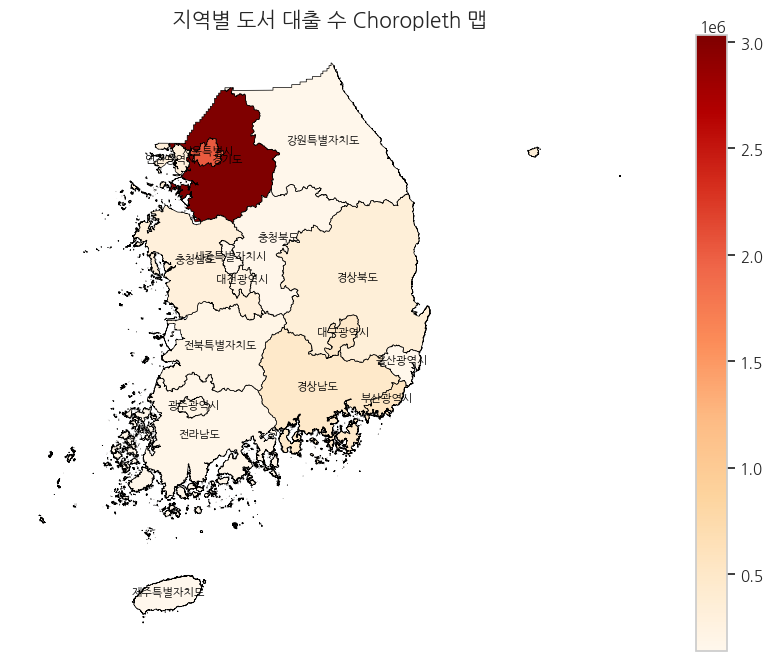

In [494]:
# matplotlib 라이브러리를 불러옵니다.
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

plt.rcParams['font.family'] = 'NanumGothic'    #사용 방법1
print(plt.rcParams['font.family'], plt.rcParams['font.size'])   # 폰트확인

# Choropleth 맵 시각화 (지역 이름 표시)
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged_gdf.plot(
    column='대출수',
    cmap='OrRd',
    legend=True,
    linewidth=0.5,
    ax=ax,
    edgecolor='black'
)

# 지역 이름 텍스트 추가
for idx, row in merged_gdf.iterrows():
    ax.text(
        row.geometry.centroid.x,  # 중심 x 좌표
        row.geometry.centroid.y,  # 중심 y 좌표
        row['지역'],               # 표시할 텍스트 (지역 이름)
        fontsize=8,               # 글자 크기
        ha='center',              # 가로 정렬
        color='black'             # 텍스트 색상
    )

# 제목 추가
ax.set_title('지역별 도서 대출 수 Choropleth 맵', fontsize=15)
ax.axis('off')  # 축 숨기기
plt.show()




---



# 전국 도서관 분포 현황

In [495]:
import pandas as pd

file_path = '/content/drive/MyDrive/bigdata_processing/전국도서관표준데이터.csv'

national_libraries = pd.read_csv(file_path, encoding='CP949')

national_libraries.head()

,도서관명,시도명,시군구명,도서관유형,휴관일,평일운영시작시각,평일운영종료시각,토요일운영시작시각,토요일운영종료시각,공휴일운영시작시각,...,운영기관명,도서관전화번호,부지면적,건물면적,홈페이지주소,위도,경도,데이터기준일자,제공기관코드,제공기관명
0,판교인생,경기도,성남시,작은도서관,공휴일,09:00,18:00,09:00,14:00,00:00,...,판교노인종합복지관,031-620-2817,NaN,234.0,https://www.snlib.go.kr/small,37.390227,127.108622,2023-08-31,3780000,경기도 성남시
1,하늘달팽이,경기도,성남시,작은도서관,토+공휴일,09:00,18:00,00:00,00:00,00:00,...,양지제1복지관,070-8861-0574,NaN,146.0,https://www.snlib.go.kr/small,37.458106,127.162618,2023-08-31,3780000,경기도 성남시
2,하얀마을秀,경기도,성남시,작은도서관,토+공휴일,09:00,18:00,00:00,00:00,00:00,...,하얀마을복지회관,031-718-2779,NaN,83.0,https://www.snlib.go.kr/small,37.344538,127.112319,2023-08-31,3780000,경기도 성남시
3,한마음점자,경기도,성남시,작은도서관,토+공휴일,09:00,18:00,00:00,00:00,00:00,...,한마음복지관,031-725-9570,NaN,427.0,https://www.snlib.go.kr/small,37.408228,127.144153,2023-08-31,3780000,경기도 성남시
4,한솔,경기도,성남시,작은도서관,토+공휴일,09:00,18:00,00:00,00:00,00:00,...,한솔종합사회복지관,031-8022-1177,NaN,190.0,https://www.snlib.go.kr/small,37.367389,127.115509,2023-08-31,3780000,경기도 성남시


### 데이터 정보를 확인해 본 결과, null 값이 있는 행은 존재하지 않아 결측치 처리는 필요하지 않았다.

In [496]:
national_libraries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3557 entries, 0 to 3556
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   도서관명        3557 non-null   object 
 1   시도명         3557 non-null   object 
 2   시군구명        3557 non-null   object 
 3   도서관유형       3557 non-null   object 
 4   휴관일         3557 non-null   object 
 5   평일운영시작시각    3557 non-null   object 
 6   평일운영종료시각    3557 non-null   object 
 7   토요일운영시작시각   3557 non-null   object 
 8   토요일운영종료시각   3557 non-null   object 
 9   공휴일운영시작시각   3557 non-null   object 
 10  공휴일운영종료시각   3557 non-null   object 
 11  열람좌석수       3557 non-null   int64  
 12  자료수(도서)     3557 non-null   object 
 13  자료수(연속간행물)  3557 non-null   int64  
 14  자료수(비도서)    3557 non-null   object 
 15  대출가능권수      3557 non-null   int64  
 16  대출가능일수      3557 non-null   int64  
 17  소재지도로명주소    3557 non-null   object 
 18  운영기관명       2827 non-null   object 
 19  도서관전화번호     3329 non-null  

### '시도명'의 고유값을 확인해본 결과, 동일 행정구역이 다른 이름으로 표현되어 있는 경우가 있었다.
- 전북특별자치도 = 전라북도   
  - 2024년 1월 18일, ‘전북특별자치도’가 출범하여 행정구역 명칭이 아래와 같이 변경됨
  - https://overseas.mofa.go.kr/cn-wuhan-ko/brd/m_22785/view.do?seq=1347269
- 강원특별자치도 = 강원도
  - 2023년 6월 11일, 628년 만에 기존의 강원도에서 강원특별자치도로 변경됨

In [497]:
unique_count = national_libraries['시도명'].nunique()
print("행정구역 갯수 : ", unique_count) # 대한민국의 행정 구역은 총 17개이나, 19개로 세어짐

행정구역 갯수 :  19


In [498]:
national_libraries['시도명'].unique()

array(['경기도', '서울특별시', '전북특별자치도', '경상북도', '제주특별자치도', '인천광역시', '충청남도',
       '울산광역시', '광주광역시', '전라남도', '충청북도', '부산광역시', '경상남도', '강원특별자치도',
       '대전광역시', '대구광역시', '세종특별자치시', '전라북도', '강원도'], dtype=object)

### 시도명 전처리 : 기존 이름을 새로운 특별자치도 이름으로 통일

In [499]:
national_libraries['시도명'] = national_libraries['시도명'].replace({
    '전라북도': '전북특별자치도',
    '강원도': '강원특별자치도',
})

# 전처리된 결과 확인
print(national_libraries['시도명'].unique())

['경기도' '서울특별시' '전북특별자치도' '경상북도' '제주특별자치도' '인천광역시' '충청남도' '울산광역시' '광주광역시'
 '전라남도' '충청북도' '부산광역시' '경상남도' '강원특별자치도' '대전광역시' '대구광역시' '세종특별자치시']


In [500]:
# 시도별 전국 도서관 개수 확인
library_count_by_region = national_libraries['시도명'].value_counts().reset_index()

# 열 이름을 '시도명'과 '도서관 수'로 변경
library_count_by_region.columns = ['시도명', '도서관 수']

# 도서관 수를 기준으로 내림차순 정렬하고 인덱스를 재설정
library_count_by_region = library_count_by_region.sort_values(by='도서관 수', ascending=False).reset_index(drop=True)

# 결과 출력: 시도별 도서관 개수를 출력
print(library_count_by_region)

        시도명  도서관 수
0     서울특별시    548
1       경기도    506
2      경상남도    386
3     광주광역시    329
4     인천광역시    255
5     대구광역시    237
6     부산광역시    198
7   전북특별자치도    162
8      경상북도    162
9      전라남도    154
10    울산광역시    150
11    대전광역시    108
12  강원특별자치도    103
13     충청남도     93
14     충청북도     85
15  제주특별자치도     57
16  세종특별자치시     24


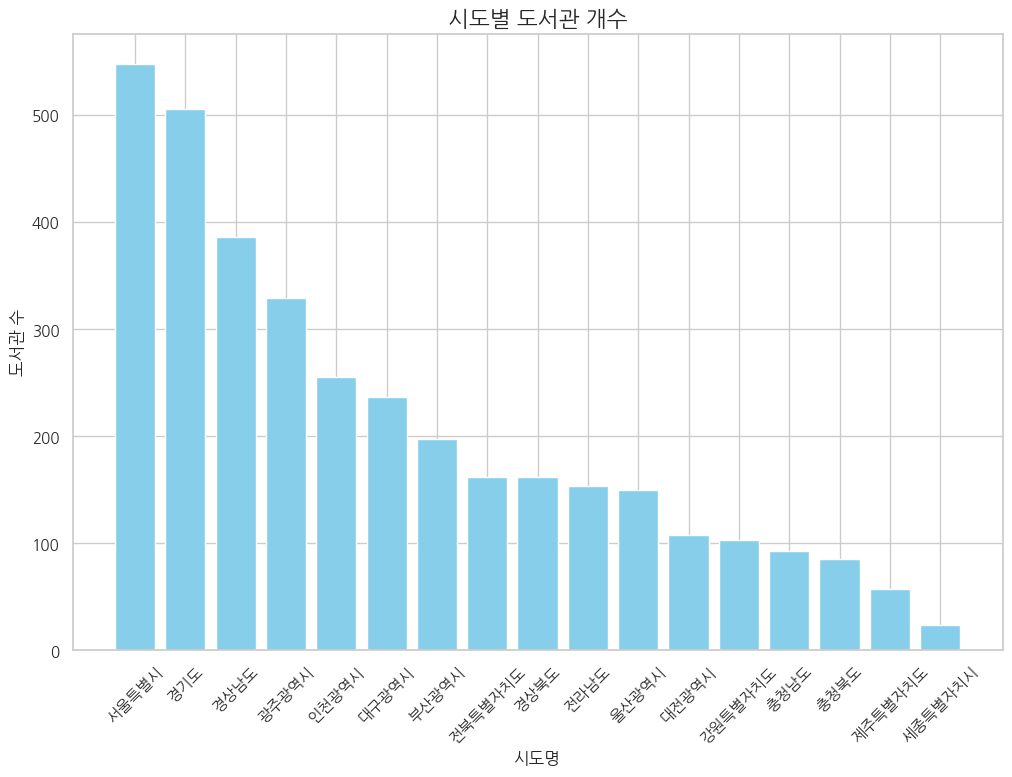

In [501]:
import matplotlib.pyplot as plt

# 그래프 크기 설정
plt.figure(figsize=(12, 8))

# 막대그래프 생성
plt.bar(library_count_by_region['시도명'], library_count_by_region['도서관 수'], color='skyblue')

# 그래프 제목 및 축 레이블 설정
plt.title('시도별 도서관 개수', fontsize=16)
plt.xlabel('시도명', fontsize=12)
plt.ylabel('도서관 수', fontsize=12)

# x축 라벨 회전 설정
plt.xticks(rotation=45)

# 그래프 출력
plt.show()

In [502]:
# NAME 열의 고유 값 출력
unique_names = gdf['지역'].unique()
print(unique_names)

['강원특별자치도' '경기도' '경상남도' '경상북도' '광주광역시' '대구광역시' '대전광역시' '부산광역시' '서울특별시'
 '세종특별자치시' '울산광역시' '인천광역시' '전라남도' '전북특별자치도' '제주특별자치도' '충청남도' '충청북도']


In [503]:
# gdf 열 이름 확인
print(gdf.columns)

# library_count_by_region 열 이름 확인
print(library_count_by_region.columns)

Index(['UFID', 'BJCD', '지역', 'DIVI', 'SCLS', 'FMTA', 'geometry'], dtype='object')
Index(['시도명', '도서관 수'], dtype='object')


In [504]:
# 'NAME' 열을 '시도명'으로 변경하여 병합 준비
gdf = gdf.rename(columns={'지역': '시도명'})

# Shapefile 데이터와 도서관 개수 데이터 병합
merged_gdf = gdf.merge(library_count_by_region, on='시도명', how='left')

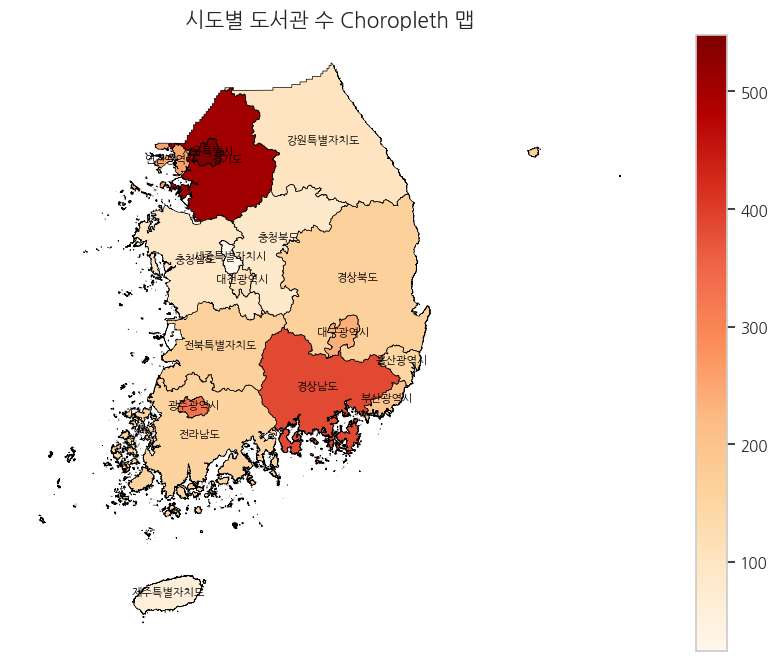

In [505]:
# Choropleth 맵 시각화
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged_gdf.plot(
    column='도서관 수',  # 색상을 도서관 수에 따라 설정
    cmap='OrRd',        # 색상 팔레트 (Oranges)
    linewidth=0.5,      # 경계선 두께
    ax=ax,              # 축 설정
    edgecolor='black',  # 경계선 색상
    legend=True         # 범례 표시
)

# 지역 이름 텍스트 추가
for idx, row in merged_gdf.iterrows():
    ax.text(
        row.geometry.centroid.x,  # 중심 x 좌표
        row.geometry.centroid.y,  # 중심 y 좌표
        row['시도명'],               # 표시할 텍스트 (지역 이름)
        fontsize=8,               # 글자 크기
        ha='center',              # 가로 정렬
        color='black'             # 텍스트 색상
    )

# 제목 추가
ax.set_title('시도별 도서관 수 Choropleth 맵', fontsize=15)
ax.axis('off')  # 축 숨기기
plt.show()

-> 도서 대출 수와 도서관 수는 무조건 비례하진 않는다. 경상남도는 행정구역 중 도서관이 많은 축에 속하지만 도서대출 수는 낮은 편이다.

# 지역별 도서관 한 곳당 평균 대출 수
(대출 수 / 도서관 수)를 통해 시각화 한다.

In [506]:
import pandas as pd

# library_count_by_region와 df_long_sorted 병합 (지역명을 기준으로)
merged_df = pd.merge(df_long_sorted, library_count_by_region, left_on='지역', right_on='시도명', how='inner')

# "도서관 한 곳당 평균 대출 수" 계산
merged_df['도서관당 평균 대출 수'] = merged_df['대출수'] / merged_df['도서관 수']

# 결과 테이블 정리
average_loans_per_library = merged_df[['지역', '대출수', '도서관 수', '도서관당 평균 대출 수']]

# 내림차순 정렬
average_loans_per_library = average_loans_per_library.sort_values(by='도서관당 평균 대출 수', ascending=False).reset_index(drop=True)

# 결과 출력
print(average_loans_per_library)

         지역      대출수  도서관 수  도서관당 평균 대출 수
0   세종특별자치시   169920     24   7080.000000
1       경기도  3033461    506   5994.982213
2     서울특별시  2022531    548   3690.750000
3      충청남도   318730     93   3427.204301
4     부산광역시   562069    198   2838.732323
5   제주특별자치도   138185     57   2424.298246
6     대전광역시   248177    108   2297.935185
7      경상북도   344051    162   2123.771605
8     대구광역시   489610    237   2065.864979
9      충청북도   164709     85   1937.752941
10  강원특별자치도   159736    103   1550.834951
11    인천광역시   317549    255   1245.290196
12     경상남도   478580    386   1239.844560
13  전북특별자치도   198123    162   1222.981481
14     전라남도   181516    154   1178.675325
15    울산광역시   152280    150   1015.200000
16    광주광역시   196921    329    598.544073


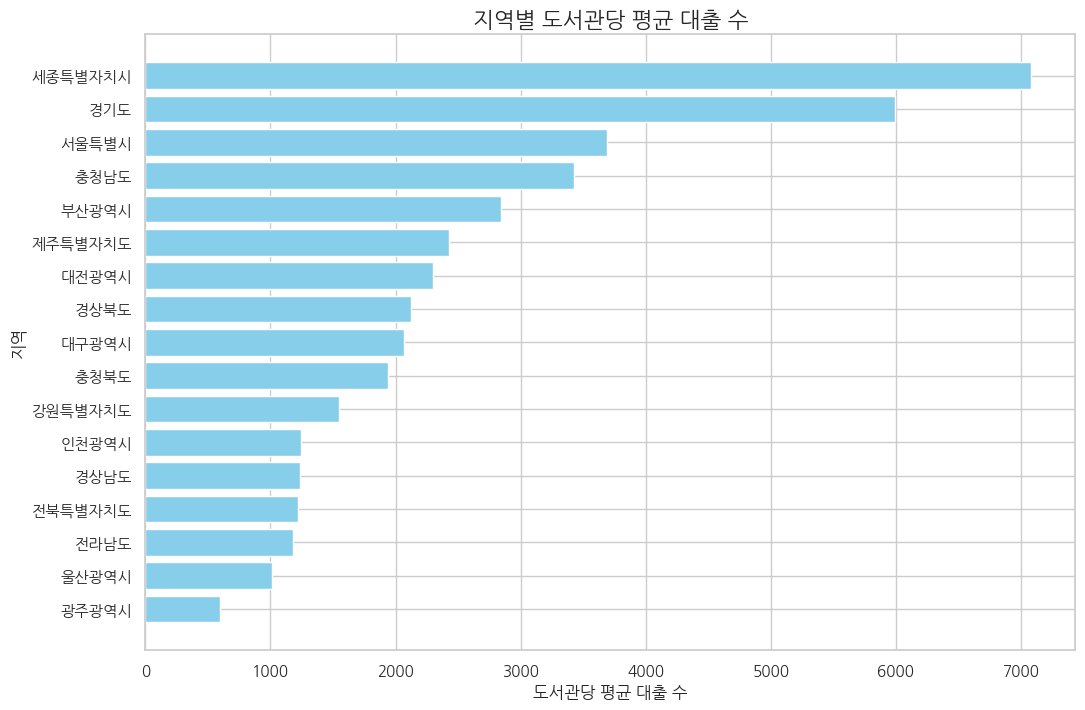

In [507]:
import matplotlib.pyplot as plt

# 그래프 크기 설정
plt.figure(figsize=(12, 8))

# 수평 막대그래프 생성
plt.barh(average_loans_per_library['지역'], average_loans_per_library['도서관당 평균 대출 수'], color='skyblue')

# 그래프 제목 및 축 레이블 설정
plt.title('지역별 도서관당 평균 대출 수', fontsize=16)
plt.xlabel('도서관당 평균 대출 수', fontsize=12)
plt.ylabel('지역', fontsize=12)

# y축 순서를 뒤집어서 가장 높은 값이 위로 오게 설정
plt.gca().invert_yaxis()

# 그래프 표시
plt.show()


In [508]:
print(merged_gdf.crs)


PROJCS["Korea_2000_Korea_Central_Belt_2010",GEOGCS["GCS_Korea_2000",DATUM["Korean_Geodetic_Datum_2002",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6737"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",38],PARAMETER["central_meridian",127],PARAMETER["scale_factor",1],PARAMETER["false_easting",200000],PARAMETER["false_northing",600000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [509]:
print(gdf.columns)
print(average_loans_per_library.columns)


Index(['UFID', 'BJCD', '시도명', 'DIVI', 'SCLS', 'FMTA', 'geometry'], dtype='object')
Index(['지역', '대출수', '도서관 수', '도서관당 평균 대출 수'], dtype='object')


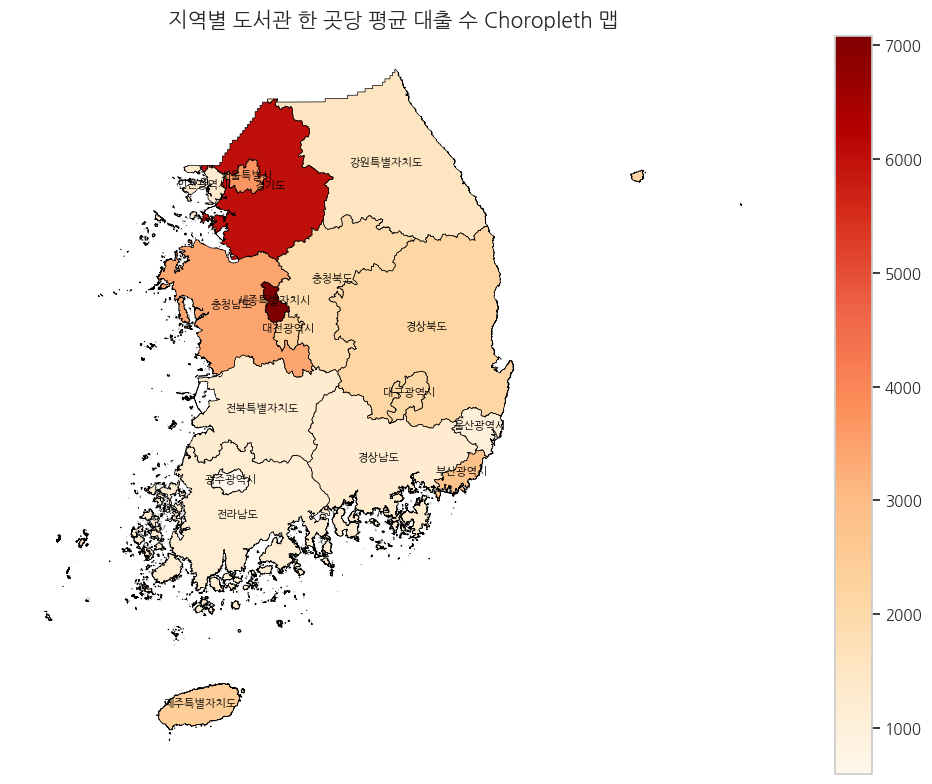

In [510]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Step 1: 한글 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 폰트 경로 설정
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 깨짐 방지

# Step 2: GeoDataFrame과 데이터 병합
# 'gdf'는 지역별 GeoDataFrame (좌표계 EPSG:3857)
# 'average_loans_per_library'는 도서관당 평균 대출 수를 포함하는 데이터프레임

gdf['시도명'] = gdf['시도명'].replace({
    '전라북도': '전북특별자치도',
    '강원도': '강원특별자치도',
})



gdf = gdf.rename(columns={'시도명': '지역'})  # 병합을 위해 열 이름 변경
merged_gdf = gdf.merge(average_loans_per_library, on='지역', how='left')

# Step 3: Choropleth 맵 그리기
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged_gdf.plot(
    column='도서관당 평균 대출 수',  # 색상을 도서관당 평균 대출 수에 따라 설정
    cmap='OrRd',        # 색상 팔레트
    linewidth=0.5,      # 경계선 두께
    ax=ax,              # 축 설정
    edgecolor='black',  # 경계선 색상
    legend=True         # 범례 표시
)

# Step 4: 지역 이름 텍스트 추가
for idx, row in merged_gdf.iterrows():
    if row.geometry.centroid.is_valid:  # 중심 좌표가 유효한 경우에만 텍스트 추가
        ax.text(
            row.geometry.centroid.x,  # 중심 x 좌표
            row.geometry.centroid.y,  # 중심 y 좌표
            row['지역'],               # 표시할 텍스트 (지역 이름)
            fontsize=8,               # 글자 크기
            ha='center',              # 가로 정렬
            color='black'             # 텍스트 색상
        )

# Step 5: 제목 및 레이아웃 설정
ax.set_title('지역별 도서관 한 곳당 평균 대출 수 Choropleth 맵', fontsize=15)
ax.axis('off')  # 축 숨기기
plt.tight_layout()
plt.show()


이 가설은 부분적으로 지지됩니다. 도서관 수와 도서 대출 수 사이에 어느 정도 상관관계가 있지만, 완전한 비례 관계는 아닙니다.

	•	경기도와 서울특별시는 도서관 수와 대출 수 모두 상위권에 속합니다.
	•	그러나 경상남도의 경우, 도서관 수는 많지만 대출 수는 상대적으로 낮습니다.
	•	세종특별자치시는 가장 적은 도서관 수(24개)를 가지고 있지만, 도서관당 평균 대출 수는 가장 높습니다(7,080권).

# 1.  지역별 도서관 한 곳당 평균 대출 수와 주변 상권과 비교

In [511]:
import pandas as pd

# 도서관 위치 데이터 읽기
file_path = '/content/drive/MyDrive/bigdata_processing/전국도서관표준데이터.csv'
library_data = pd.read_csv(file_path, encoding='euc-kr')

library_data['시도명'] = library_data['시도명'].replace({
    '전라북도': '전북특별자치도',
    '강원도': '강원특별자치도',
})

# 전처리된 결과 확인
print(national_libraries['시도명'].unique())

# 필요한 열만 추출
library_data = library_data[['도서관명', '시도명', '위도', '경도']]
print(library_data.head())

['경기도' '서울특별시' '전북특별자치도' '경상북도' '제주특별자치도' '인천광역시' '충청남도' '울산광역시' '광주광역시'
 '전라남도' '충청북도' '부산광역시' '경상남도' '강원특별자치도' '대전광역시' '대구광역시' '세종특별자치시']
    도서관명  시도명         위도          경도
0   판교인생  경기도  37.390227  127.108622
1  하늘달팽이  경기도  37.458106  127.162618
2  하얀마을秀  경기도  37.344538  127.112319
3  한마음점자  경기도  37.408228  127.144153
4     한솔  경기도  37.367389  127.115509


In [512]:
import os

# 폴더 경로 설정
folder_path = '/content/drive/MyDrive/bigdata_processing/소상공인시장진흥공단_상가(상권)정보_20220630'
all_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]

# 모든 CSV 파일 병합
commerce_data = pd.concat((pd.read_csv(file, encoding='utf-8') for file in all_files), ignore_index=True)

# 상권 데이터의 실제 열 이름 확인
print(commerce_data.columns)

<ipython-input-512-17ba52784501>:8: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  commerce_data = pd.concat((pd.read_csv(file, encoding='utf-8') for file in all_files), ignore_index=True)
<ipython-input-512-17ba52784501>:8: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  commerce_data = pd.concat((pd.read_csv(file, encoding='utf-8') for file in all_files), ignore_index=True)
<ipython-input-512-17ba52784501>:8: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  commerce_data = pd.concat((pd.read_csv(file, encoding='utf-8') for file in all_files), ignore_index=True)
<ipython-input-512-17ba52784501>:8: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  commerce_data = pd.concat((pd.read_csv(file, encoding='utf-8') for file in all_files), ignore_index=True)
<ipython-input-512-1

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')


In [513]:
commerce_data.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,21706657,동경부동산,NaN,L,부동산,L01,부동산중개,L01A01,부동산중개,L68221,...,5013010100102900005031397,동문레코드,제주특별자치도 서귀포시 중앙로 70-1,697843.0,63591.0,NaN,NaN,NaN,126.561556,33.250877
1,17174231,에프케이알레그리아호텔제주,NaN,O,숙박,O01,호텔/콘도,O01A01,호텔/콘도,NaN,...,5013010100103190002000005,비스타케이호텔(천지연),제주특별자치도 서귀포시 중앙로47번길 25,697844.0,63592.0,NaN,NaN,NaN,126.559015,33.248179
2,17173846,아빠가닭튀기는집,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,5011025024011990003006865,NaN,제주특별자치도 제주시 한림읍 한림중앙로 26,695932.0,63032.0,NaN,NaN,NaN,126.264860,33.412363
3,20823993,현임옥헤어샵,NaN,F,생활서비스,F01,이/미용/건강,F01A01,여성미용실,S96112,...,5011012200126130007064597,NaN,제주특별자치도 제주시 정존11길 29,690805.0,63102.0,NaN,NaN,NaN,126.474887,33.485978
4,15517264,금실홈패션,NaN,D,소매,D07,가정/주방/인테리어,D07A09,홈패션,G47411,...,5011010800101350009019203,서문공설시장,제주특별자치도 제주시 서문로4길 13-2,690819.0,63154.0,NaN,NaN,NaN,126.517956,33.511339


In [514]:
# commerce_data 데이터프레임의 행 개수 출력
print(f"filtered_commerce 행 개수: {len(commerce_data)}")

filtered_commerce 행 개수: 2363994


## 상권업종대분류명과 도서관당 평균 대출 수 간 상관계수


In [515]:
import pandas as pd

# 1단계: 필요한 열만 필터링
commerce_big_data_filtered = commerce_data[['시도명', '상권업종대분류명']]

# 2단계: '시도명'과 '상권업종대분류명'으로 그룹화하고 발생 횟수(개수)를 계산
commerce_big_data_grouped = commerce_big_data_filtered.groupby(['시도명', '상권업종대분류명']).size().reset_index(name='상권 개수')

# 3단계: 피벗 테이블 생성 (행: 시도명, 열: 상권업종대분류명, 값: 상권 개수)
commerce_big_data_pivot = commerce_big_data_grouped.pivot(index='시도명', columns='상권업종대분류명', values='상권 개수').fillna(0)

# 4단계: 인덱스 초기화하여 데이터를 더 읽기 쉽게 만듭니다.
commerce_big_data_pivot.reset_index(inplace=True)

# 5단계: 결과 데이터프레임 출력
print(commerce_big_data_pivot)

상권업종대분류명      시도명  관광/여가/오락    부동산   생활서비스      소매    숙박   스포츠      음식  학문/교육
0             강원도      2047   2407   16380   33200  5627  1136   39692   5295
1             경기도     13148  29132  101963  170840  5844  7690  174428  43507
2            경상남도      3312   5163   26989   48291  4089  1828   60145  10838
3            경상북도      2685   3554   24085   44284  3676  1451   49912   7907
4           광주광역시      1765   3187   14506   24789   493   851   22546   5684
5           대구광역시      2285   4203   19826   33764   654  1293   34788   7252
6           대전광역시      1770   2707   14029   24597   585   854   23311   5183
7           부산광역시      3293   6646   27944   50859  1695  1980   50539   9945
8           서울특별시      8404  17356   69233  101805  2320  5175  117033  24903
9         세종특별자치시       281    960    1884    3093    67   164    4477   1006
10          울산광역시      1302   1710    8703   13188   645   555   17869   3935
11          인천광역시      3146   5610   23220   35608  1660  1410  

상권업종별 상관계수:
관광/여가/오락    0.419653
부동산         0.480203
생활서비스       0.412026
소매          0.404480
숙박          0.144849
스포츠         0.445211
음식          0.398707
학문/교육       0.434416
Name: 도서관당 평균 대출 수, dtype: float64


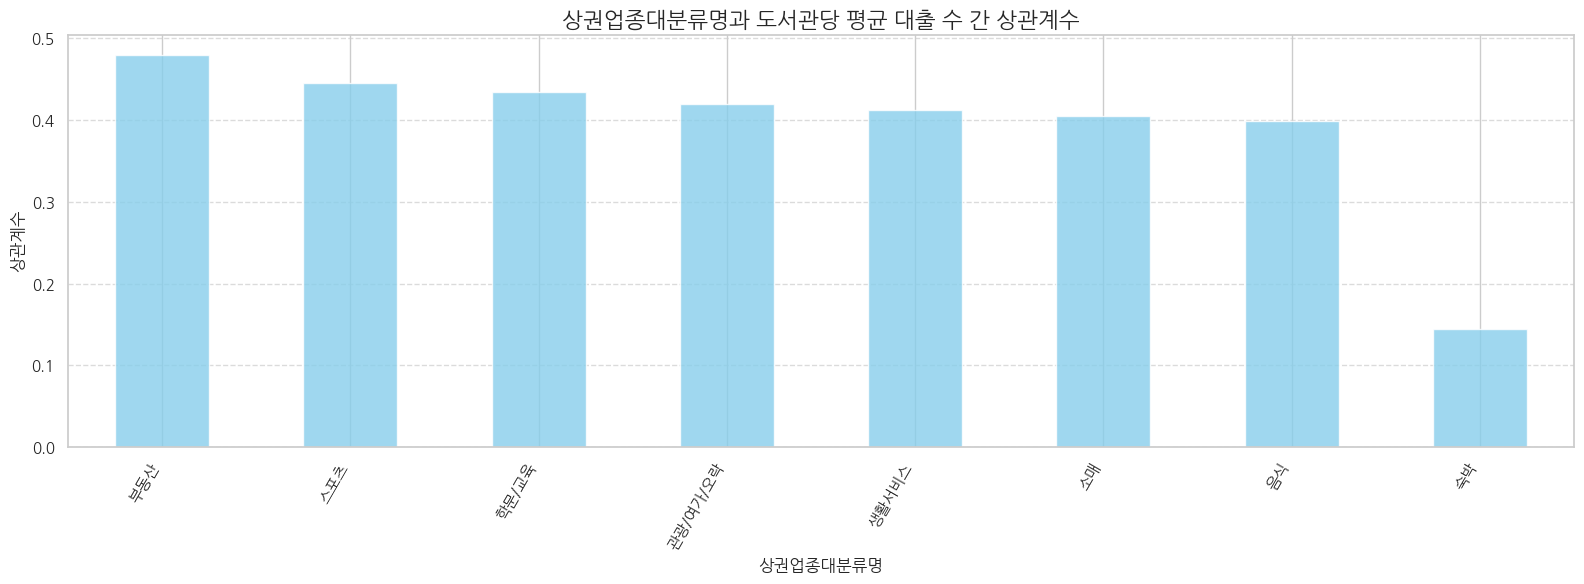

In [516]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: `commerce_pivot`와 `average_loans_per_library` 병합
# `average_loans_per_library`는 '지역'(시도명)과 '도서관당 평균 대출 수' 데이터를 포함
average_loans_per_library.rename(columns={'지역': '시도명'}, inplace=True)  # 열 이름 통일
merged_data = pd.merge(average_loans_per_library[['시도명', '도서관당 평균 대출 수']], commerce_big_data_pivot, on='시도명', how='inner')

# Step 2: 상관계수 계산=
numeric_data = merged_data.select_dtypes(include=['number'])
correlation_result = numeric_data.corr()['도서관당 평균 대출 수'].drop('도서관당 평균 대출 수')

# Step 3: 상관계수 출력
print("상권업종별 상관계수:")
print(correlation_result)

# Step 4: 상관계수 시각화 (막대그래프)
plt.figure(figsize=(16, 6))
correlation_result.sort_values(ascending=False).plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('상권업종대분류명과 도서관당 평균 대출 수 간 상관계수', fontsize=16)
plt.ylabel('상관계수', fontsize=12)
plt.xlabel('상권업종대분류명', fontsize=12)
plt.xticks(rotation=60, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 상권업종중분류명과 도서관당 평균 대출 수 간 상관계수

In [517]:
import pandas as pd

# 1단계: 필요한 열만 필터링
commerce_middle_data_filtered = commerce_data[['시도명', '상권업종중분류명']]

# 2단계: '시도명'과 '상권업종중분류명'으로 그룹화하고 발생 횟수(개수)를 계산
commerce_middle_data_grouped = commerce_middle_data_filtered.groupby(['시도명', '상권업종중분류명']).size().reset_index(name='상권 개수')

# 3단계: 피벗 테이블 생성 (행: 시도명, 열: 상권업종중분류명, 값: 상권 개수)
commerce_middle_data_pivot = commerce_middle_data_grouped.pivot(index='시도명', columns='상권업종중분류명', values='상권 개수').fillna(0)

# 4단계: 인덱스 초기화하여 데이터를 더 읽기 쉽게 만듭니다.
commerce_middle_data_pivot.reset_index(inplace=True)

# 5단계: 결과 데이터프레임 출력
print(commerce_middle_data_pivot)

상권업종중분류명      시도명  PC/오락/당구/볼링등    가구소매  가방/신발/액세서리  가전제품소매  가정/주방/인테리어  \
0             강원도         768.0   554.0      1020.0   380.0      3240.0   
1             경기도        4375.0  4326.0      5348.0  2375.0     18296.0   
2            경상남도        1016.0   928.0      1549.0   682.0      4781.0   
3            경상북도         959.0   733.0      1223.0   683.0      4121.0   
4           광주광역시         689.0   559.0       824.0   409.0      2746.0   
5           대구광역시         642.0   636.0      1489.0   508.0      3502.0   
6           대전광역시         518.0   454.0       896.0   391.0      2540.0   
7           부산광역시        1060.0   918.0      2795.0   740.0      4810.0   
8           서울특별시        2634.0  1223.0      4630.0  1585.0      7850.0   
9         세종특별자치시          78.0    46.0        77.0    47.0       246.0   
10          울산광역시         383.0   268.0       472.0   192.0      1381.0   
11          인천광역시        1019.0   637.0      1065.0   565.0      3754.0   
12           전라남도        

상권업종별 상관계수:
PC/오락/당구/볼링등    0.417241
가구소매            0.428451
가방/신발/액세서리      0.381294
가전제품소매          0.376965
가정/주방/인테리어      0.407951
                  ...   
학원기타            0.434693
한식              0.384547
행사/이벤트          0.385829
호텔/콘도           0.324712
화장품소매           0.417351
Name: 도서관당 평균 대출 수, Length: 89, dtype: float64


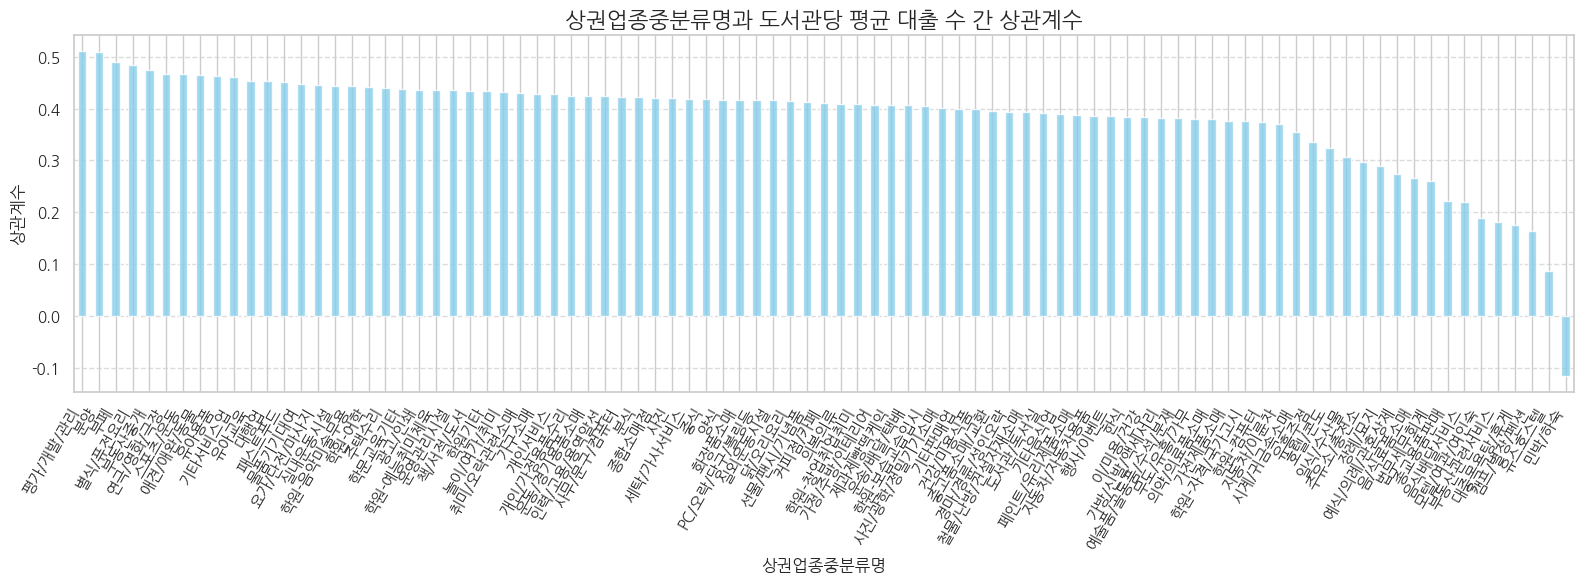

In [518]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: `commerce_pivot`와 `average_loans_per_library` 병합
# `average_loans_per_library`는 '지역'(시도명)과 '도서관당 평균 대출 수' 데이터를 포함
result_df.rename(columns={'지역': '시도명'}, inplace=True)  # 열 이름 통일
merged_data = pd.merge(average_loans_per_library[['시도명', '도서관당 평균 대출 수']], commerce_pivot, on='시도명', how='inner')

# Step 2: 상관계수 계산=
numeric_data = merged_data.select_dtypes(include=['number'])
correlation_result = numeric_data.corr()['도서관당 평균 대출 수'].drop('도서관당 평균 대출 수')

# Step 3: 상관계수 출력
print("상권업종별 상관계수:")
print(correlation_result)

# Step 4: 상관계수 시각화 (막대그래프)
plt.figure(figsize=(16, 6))
correlation_result.sort_values(ascending=False).plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('상권업종중분류명과 도서관당 평균 대출 수 간 상관계수', fontsize=16)
plt.ylabel('상관계수', fontsize=12)
plt.xlabel('상권업종중분류명', fontsize=12)
plt.xticks(rotation=60, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

상권 업종별 도서관당 평균 대출 수와의 상관계수:
PC/오락/당구/볼링등    0.417241
가구소매            0.428451
가방/신발/액세서리      0.381294
가전제품소매          0.376965
가정/주방/인테리어      0.407951
                  ...   
학원기타            0.434693
한식              0.384547
행사/이벤트          0.385829
호텔/콘도           0.324712
화장품소매           0.417351
Name: 도서관당 평균 대출 수, Length: 89, dtype: float64


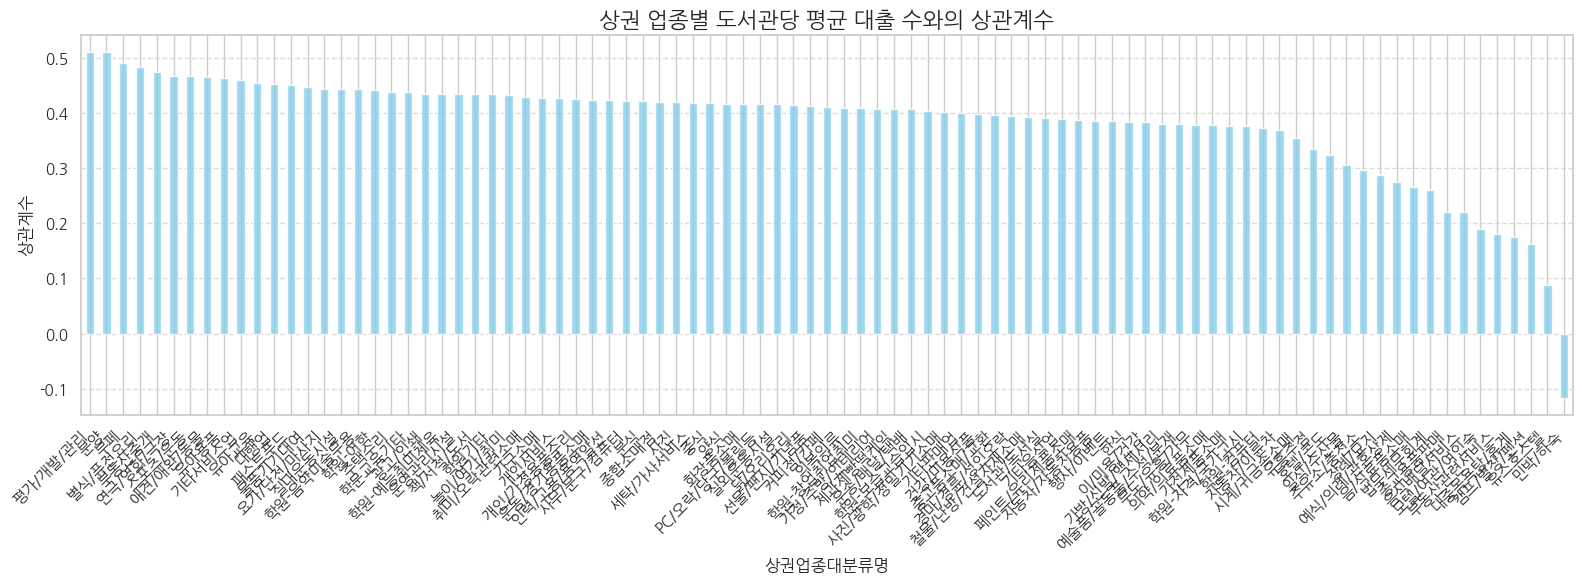

In [519]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# result_df의 '지역'과 commerce_pivot의 '시도명' 열 이름을 맞춰줍니다.
average_loans_per_library.rename(columns={'지역': '시도명'}, inplace=True)

# Step 2: 데이터 병합
merged_data = pd.merge(average_loans_per_library[['시도명', '도서관당 평균 대출 수']], commerce_pivot, on='시도명', how='inner')

numeric_data = merged_data.select_dtypes(include=['number'])

# Step 3: 상관계수 계산
correlation_result = numeric_data.corr()['도서관당 평균 대출 수'].drop('도서관당 평균 대출 수')

# Step 4: 상관관계 출력
print("상권 업종별 도서관당 평균 대출 수와의 상관계수:")
print(correlation_result)

# Step 5: 상관관계 시각화 (막대그래프)
plt.figure(figsize=(16, 6))
correlation_result.sort_values(ascending=False).plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('상권 업종별 도서관당 평균 대출 수와의 상관계수', fontsize=16)
plt.ylabel('상관계수', fontsize=12)
plt.xlabel('상권업종대분류명', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 도서관 반경 1km 상권과 도서관당 평균 대출 수와의 상관계수

In [520]:
import geopandas as gpd
from shapely.geometry import Point

# Step 1: 도서관 데이터를 GeoDataFrame으로 변환
library_gdf = gpd.GeoDataFrame(
    library_data,
    geometry=gpd.points_from_xy(library_data['경도'], library_data['위도']),
    crs='EPSG:4326'
)

# Step 2: 상권 데이터를 GeoDataFrame으로 변환
commerce_gdf = gpd.GeoDataFrame(
    commerce_data,
    geometry=gpd.points_from_xy(commerce_data['경도'], commerce_data['위도']),
    crs='EPSG:4326'
)

# Step 3: 좌표계를 적합한 단위 (EPSG:3857)로 변경
library_gdf = library_gdf.to_crs(epsg=3857)
commerce_gdf = commerce_gdf.to_crs(epsg=3857)

# Step 4: 도서관 반경 1km 버퍼 생성
library_gdf['buffer'] = library_gdf.geometry.buffer(1000)  # 1km = 1000m

# Step 5: 도서관 버퍼 GeoDataFrame 생성
buffer_gdf = gpd.GeoDataFrame(library_gdf[['buffer']], geometry='buffer', crs=library_gdf.crs)

# Step 6: 공간 조인으로 도서관 반경 1km 내 상권 데이터 추출
filtered_commerce = gpd.sjoin(commerce_gdf, buffer_gdf, how='inner', predicate='intersects')

# Step 7: 필터링된 데이터로 필요한 열만 유지
filtered_commerce = filtered_commerce[['상호명', '상권업종대분류명', '시도명', '위도', '경도']]

관광/여가/오락    0.121545
부동산         0.168869
생활서비스       0.087395
소매          0.032483
숙박         -0.026707
스포츠         0.159584
음식          0.064956
학문/교육       0.117140
Name: 도서관당 평균 대출 수, dtype: float64


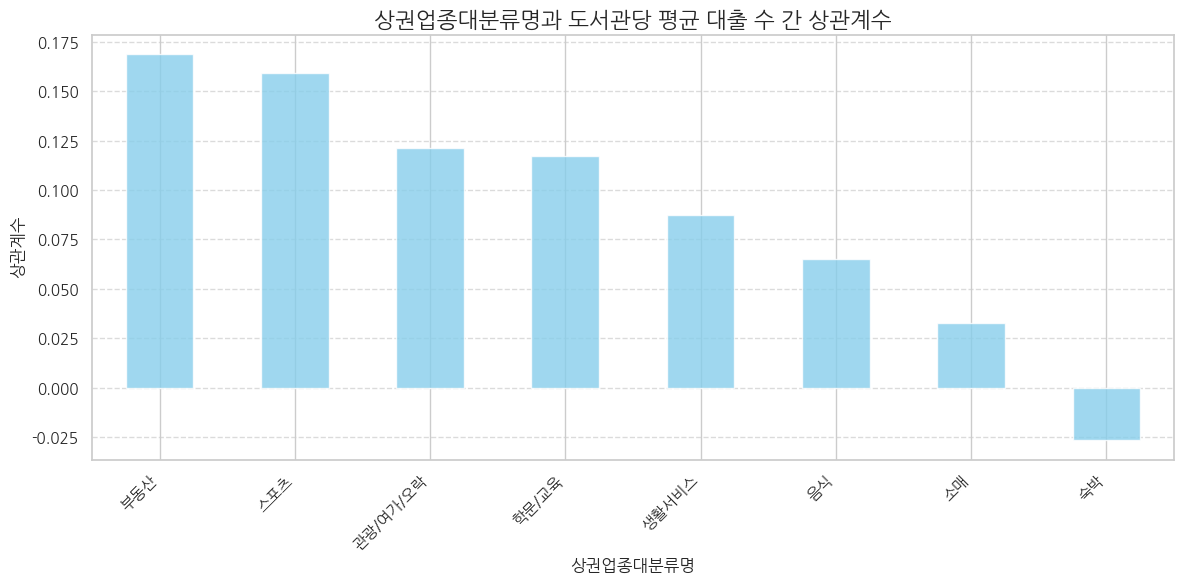

In [521]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: 지역별 상권업종별 상권 개수 집계
filtered_commerce_grouped = filtered_commerce.groupby(['시도명', '상권업종대분류명']).size().reset_index(name='상권 개수')

# Step 2: 피벗 테이블 생성 (행: 지역, 열: 상권업종대분류명, 값: 상권 개수)
filtered_commerce_pivot = filtered_commerce_grouped.pivot(index='시도명', columns='상권업종대분류명', values='상권 개수').fillna(0)

# Step 3: 도서관당 평균 대출 수 데이터와 병합
# average_loans_per_library는 '지역' 열이 포함된 도서관당 평균 대출 수 데이터
average_loans_per_library.rename(columns={'지역': '시도명'}, inplace=True)
merged_data = pd.merge(average_loans_per_library[['시도명', '도서관당 평균 대출 수']], filtered_commerce_pivot, on='시도명', how='inner')

numeric_data = merged_data.select_dtypes(include=['number'])

# Step 4: 상관계수 계산
correlation_result = numeric_data.corr()['도서관당 평균 대출 수'].drop('도서관당 평균 대출 수')

# Step 5: 상관관계 출력
print(correlation_result)

# Step 6: 상관관계 시각화 (막대그래프)
plt.figure(figsize=(12, 6))
correlation_result.sort_values(ascending=False).plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('상권업종대분류명과 도서관당 평균 대출 수 간 상관계수', fontsize=16)
plt.ylabel('상관계수', fontsize=12)
plt.xlabel('상권업종대분류명', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [522]:
# filtered_commerce 데이터프레임의 행 개수 출력
print(f"filtered_commerce 행 개수: {len(filtered_commerce)}")

filtered_commerce 행 개수: 3548665


상권업종과 도서관당 평균 대출 수 사이에 약한 양의 상관관계가 있습니다.

	•	부동산(0.480), 스포츠(0.445), 학문/교육(0.434) 업종과 도서관당 평균 대출 수 사이에 가장 높은 상관관계가 나타났습니다.
	•	숙박업(0.145)을 제외한 모든 업종이 0.4 이상의 상관계수를 보였습니다.
이는 교육 시설뿐만 아니라 다양한 상권 업종이 도서 대출 수와 관련이 있음을 시사합니다.

# 2. 접근성(정류장 기준)과의 상관관계

In [523]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 한글 폰트 설정 (나눔고딕 폰트 사용)
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 시스템에 설치된 폰트 경로
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 깨짐 방지

# 데이터 로드
csv_path = '/content/drive/MyDrive/bigdata_processing/국토교통부_전국 버스정류장 위치정보_20221012/2022년_전국버스정류장 위치정보_데이터.csv'

# CSV 파일 로드
station_data = pd.read_csv(csv_path, encoding='utf-8')  # 인코딩 확인 필요

library_location = national_libraries[["위도", "경도"]]

In [524]:
average_loans_per_library.columns

Index(['시도명', '대출수', '도서관 수', '도서관당 평균 대출 수'], dtype='object')

In [525]:
library_location.columns

Index(['위도', '경도'], dtype='object')

In [526]:
library_location.head()

,위도,경도
0,37.390227,127.108622
1,37.458106,127.162618
2,37.344538,127.112319
3,37.408228,127.144153
4,37.367389,127.115509


In [527]:
# 도서관 데이터 GeoDataFrame으로 변환
library_gdf = gpd.GeoDataFrame(
    national_libraries,  # 원본 데이터프레임
    geometry=gpd.points_from_xy(
        national_libraries['경도'], national_libraries['위도']
    ),  # 경도, 위도로 포인트 생성
    crs='EPSG:4326'  # WGS84 좌표계
)

# 정류장 데이터 GeoDataFrame으로 변환
station_gdf = gpd.GeoDataFrame(
    station_data,
    geometry=gpd.points_from_xy(station_data['경도'], station_data['위도']),  # 정류장 경도, 위도
    crs='EPSG:4326'  # WGS84 좌표계
)

library_gdf = library_gdf.to_crs(epsg=3857)
station_gdf = station_gdf.to_crs(epsg=3857)

# Step 3: 도서관 반경 500m 버퍼 생성
library_gdf['buffer'] = library_gdf.geometry.buffer(500)  # 500m 반경 생성

# Step 4: 도서관 버퍼 데이터 생성
buffer_gdf = gpd.GeoDataFrame(library_gdf[['buffer', '시도명']], geometry='buffer', crs=library_gdf.crs)

# Step 5: 공간 조인으로 도서관 반경 500m 내 정류장 데이터 추출
filtered_station = gpd.sjoin(
    station_gdf,          # 정류장 데이터
    buffer_gdf,           # 도서관 버퍼 데이터
    how='inner',          # 도서관 버퍼 내에 포함된 정류장만 선택
    predicate='intersects'  # 정류장이 도서관 반경과 교차하는지 확인
)

# Step 6: 필터링된 데이터 확인
print(filtered_station.head())  # 도서관 반경 500m 내 정류장 데이터 출력

           정류장번호     정류장명        위도         경도          정보수집일시  모바일단축번호  \
57  ASB285000649   방죽안오거리  36.81744  127.15115  20221012050123    649.0   
58  ASB285000650   방죽안오거리  36.81758  127.15149  20221012050123    650.0   
59  ASB285000651  복자여자중고교  36.81531  127.15021  20221012050123    651.0   
60  ASB285000652  복자여자중고교  36.81512  127.14992  20221012050123    652.0   
61  ASB285000653     삼도상가  36.81206  127.14881  20221012050123    653.0   

     도시코드  도시명 관리도시명                          geometry  index_right   시도명  
57  34040  아산시    아산  POINT (14154401.272 4413690.735)          389  충청남도  
58  34040  아산시    아산   POINT (14154439.12 4413710.202)          389  충청남도  
59  34040  아산시    아산  POINT (14154296.631 4413394.554)          389  충청남도  
60  34040  아산시    아산  POINT (14154264.349 4413368.134)          389  충청남도  
61  34040  아산시    아산  POINT (14154140.784 4412942.651)          389  충청남도  


In [528]:
# Step 7: 지역별 정류장 수 집계
station_count_by_region = (
    filtered_station.groupby('시도명')
    .size()  # 각 시도별 정류장 수 계산
    .reset_index(name='정류장 수')  # 결과를 DataFrame으로 반환
)

# Step 8: 결과 확인
print(station_count_by_region)

        시도명  정류장 수
0   강원특별자치도    473
1       경기도   5807
2      경상남도   3741
3      경상북도   1079
4     광주광역시   2864
5     대구광역시   4021
6     대전광역시   1084
7     부산광역시    281
8     서울특별시   9332
9   세종특별자치시    440
10    울산광역시   1609
11    인천광역시   3006
12     전라남도   1128
13  전북특별자치도   1019
14  제주특별자치도    443
15     충청남도    431
16     충청북도    600


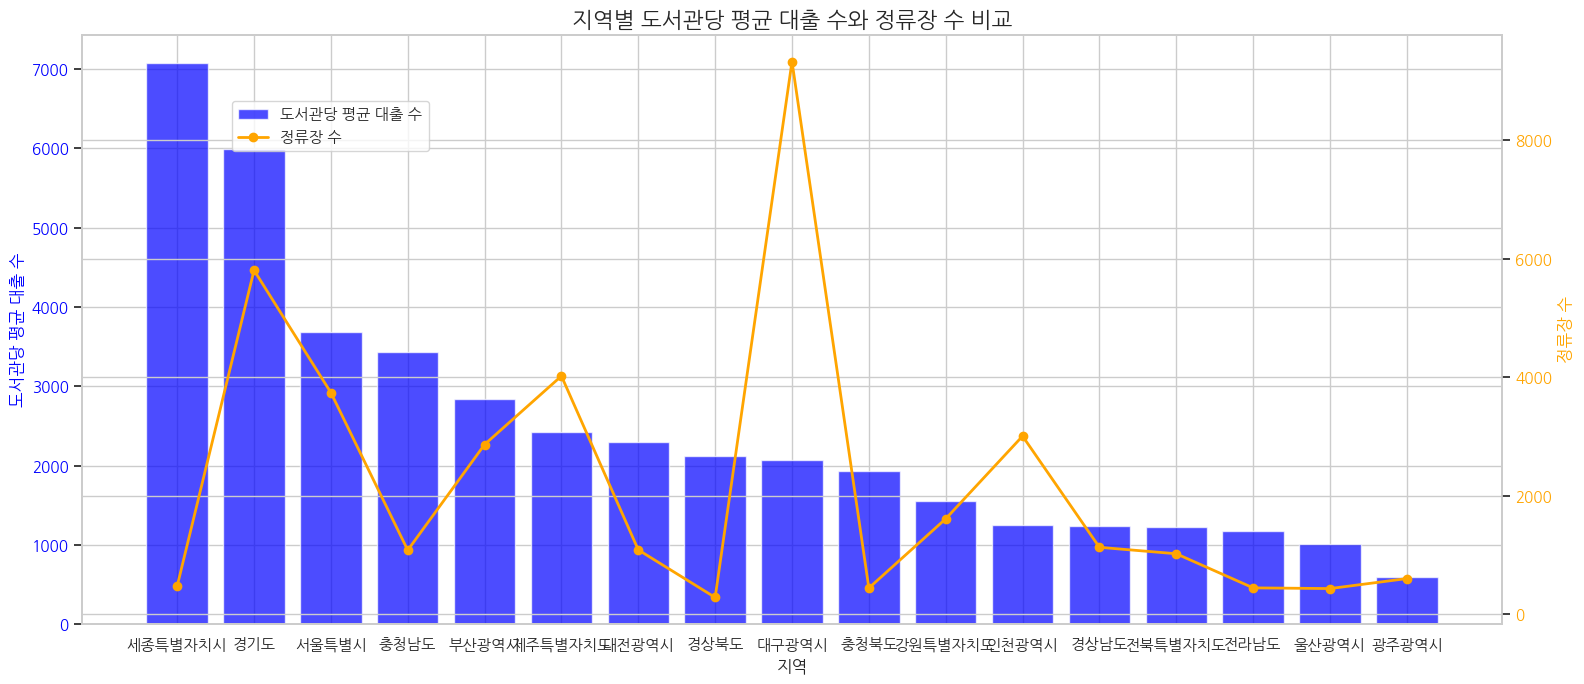

In [529]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 준비
regions = average_loans_per_library['시도명']
library_loans = average_loans_per_library['도서관당 평균 대출 수']
station_counts = station_count_by_region['정류장 수']

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(16, 7))

# 첫 번째 Y축 (도서관당 평균 대출 수)
ax1.bar(regions, library_loans, color='blue', alpha=0.7, label='도서관당 평균 대출 수')
ax1.set_ylabel('도서관당 평균 대출 수', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 두 번째 Y축 (정류장 수)
ax2 = ax1.twinx()
ax2.plot(regions, station_counts, color='orange', marker='o', linestyle='-', linewidth=2, label='정류장 수')
ax2.set_ylabel('정류장 수', fontsize=12, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# X축 설정
ax1.set_xlabel('지역', fontsize=12)
plt.xticks(rotation=45, ha='right')

# 범례 추가
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9), bbox_transform=ax1.transAxes)

# 제목 설정
plt.title('지역별 도서관당 평균 대출 수와 정류장 수 비교', fontsize=16)

# 레이아웃 조정 및 표시
plt.tight_layout()
plt.show()


정류장 수가 많은 지역(예: 서울특별시, 경기도)은 도서관당 대출 수가 평균 이하로 나타났습니다.
이는 대중교통 접근성이 높더라도 도서관 이용률과 직접적인 상관관계가 낮을 수 있음을 의미합니다. 교통 접근성보다는 도서관 프로그램, 시설 수준 등의 요인이 대출률에 더 큰 영향을 미쳤을 가능성이 있습니다.

# 3. 디지털 문화 역세권인지에 따른 도서 대출량

In [530]:
# 데이터 로드
csv_path = '/content/drive/MyDrive/bigdata_processing/디지털 문화역세권 (2022).csv'

# CSV 파일 로드
digital_subway = pd.read_csv(csv_path, encoding='utf-8')  # 인코딩 확인 필요
digital_subway.head()

,CTPRVN_NM,SIGNGU_NM,SIGNGU_CD,SCCNT_YM,FCLTY_CL_NM,FCLTY_CO,SEARCH_CO,FILE_NM,BASE_DE
0,서울특별시,종로구,1111000000,20230119,공공도서관,6,2689,KC_597_DGT_CLT_STATN_BIZAEA_2022,20221231
1,서울특별시,종로구,1111000000,20230119,박물관,23,41022,KC_597_DGT_CLT_STATN_BIZAEA_2022,20221231
2,서울특별시,종로구,1111000000,20230119,미술관,15,135923,KC_597_DGT_CLT_STATN_BIZAEA_2022,20221231
3,서울특별시,중구,1114000000,20230119,문예회관,1,79526,KC_597_DGT_CLT_STATN_BIZAEA_2022,20221231
4,서울특별시,중구,1114000000,20230119,공공도서관,3,6,KC_597_DGT_CLT_STATN_BIZAEA_2022,20221231


In [531]:
digital_subway

# 새로운 열 이름 리스트
new_columns = ['시도명', '시군구명', '시군구코드', '검색량년월', '시설분류명',
               '시설수', '검색수', '파일명', '기준일자']

# 열 이름 변경
digital_subway.columns = new_columns
digital_subway.head()

,시도명,시군구명,시군구코드,검색량년월,시설분류명,시설수,검색수,파일명,기준일자
0,서울특별시,종로구,1111000000,20230119,공공도서관,6,2689,KC_597_DGT_CLT_STATN_BIZAEA_2022,20221231
1,서울특별시,종로구,1111000000,20230119,박물관,23,41022,KC_597_DGT_CLT_STATN_BIZAEA_2022,20221231
2,서울특별시,종로구,1111000000,20230119,미술관,15,135923,KC_597_DGT_CLT_STATN_BIZAEA_2022,20221231
3,서울특별시,중구,1114000000,20230119,문예회관,1,79526,KC_597_DGT_CLT_STATN_BIZAEA_2022,20221231
4,서울특별시,중구,1114000000,20230119,공공도서관,3,6,KC_597_DGT_CLT_STATN_BIZAEA_2022,20221231


In [532]:
# 시도명별 시설수 합계 계산
cultural_facilities_count_per_city = digital_subway.groupby('시도명')['시설수'].sum().reset_index()

# 결과 확인
print(cultural_facilities_count_per_city)

        시도명  시설수
0       강원도  117
1       경기도  320
2      경상남도   94
3      경상북도  110
4     광주광역시   38
5     대구광역시   52
6     대전광역시   31
7     부산광역시   63
8     서울특별시  253
9   세종특별자치시   11
10    울산광역시   26
11    인천광역시   66
12     전라남도  106
13     전라북도   82
14  제주특별자치도   49
15     충청남도   72
16     충청북도   64


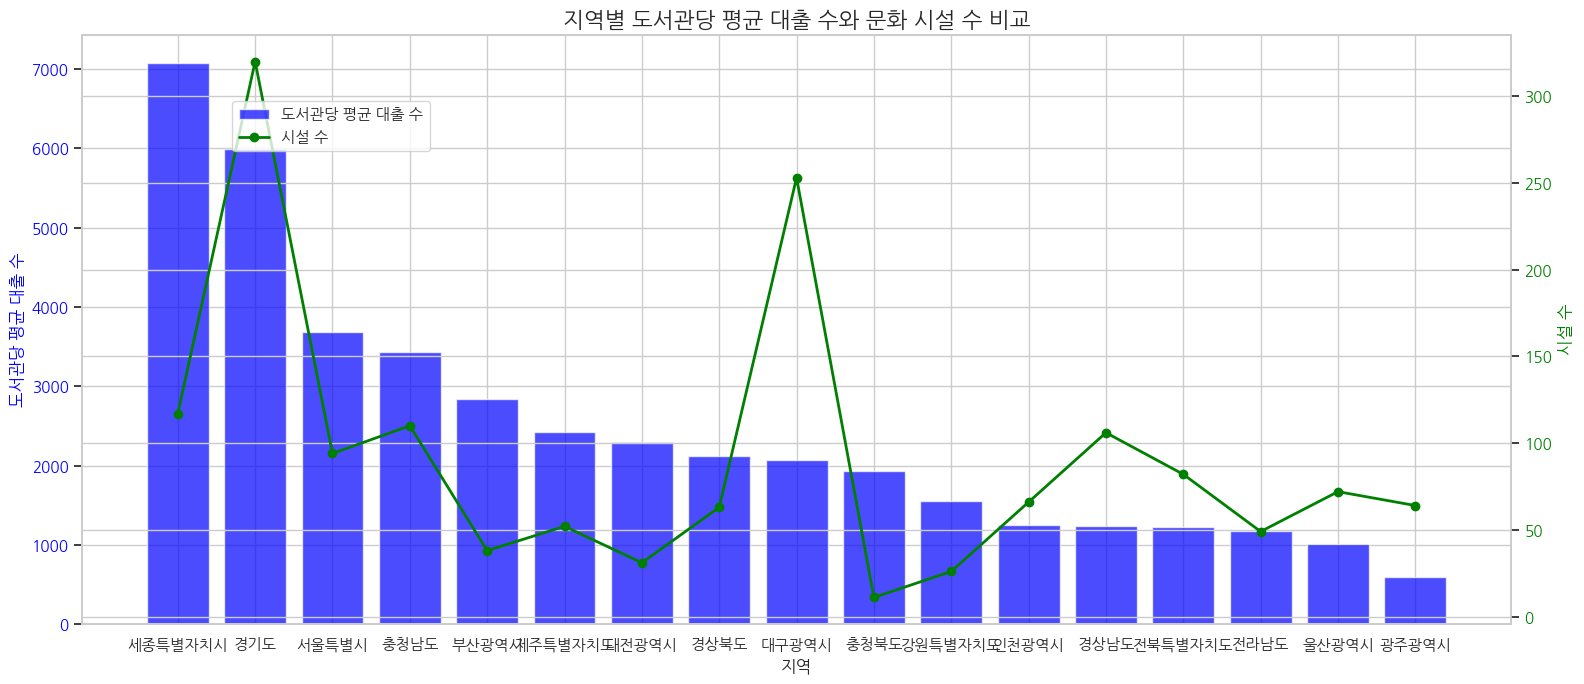

In [533]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 준비
regions = average_loans_per_library['시도명']  # 지역 이름
library_loans = average_loans_per_library['도서관당 평균 대출 수']  # 도서관당 평균 대출 수
facility_counts = cultural_facilities_count_per_city['시설수']  # 시설 수

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(16, 7))

# 첫 번째 Y축 (도서관당 평균 대출 수)
ax1.bar(regions, library_loans, color='blue', alpha=0.7, label='도서관당 평균 대출 수')
ax1.set_ylabel('도서관당 평균 대출 수', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 두 번째 Y축 (시설 수)
ax2 = ax1.twinx()
ax2.plot(regions, facility_counts, color='green', marker='o', linestyle='-', linewidth=2, label='시설 수')
ax2.set_ylabel('시설 수', fontsize=12, color='green')
ax2.tick_params(axis='y', labelcolor='green')

# X축 설정
ax1.set_xlabel('지역', fontsize=12)
plt.xticks(rotation=45, ha='right')

# 범례 추가
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9), bbox_transform=ax1.transAxes)

# 제목 설정
plt.title('지역별 도서관당 평균 대출 수와 문화 시설 수 비교', fontsize=16)

# 레이아웃 조정 및 표시
plt.tight_layout()
plt.show()

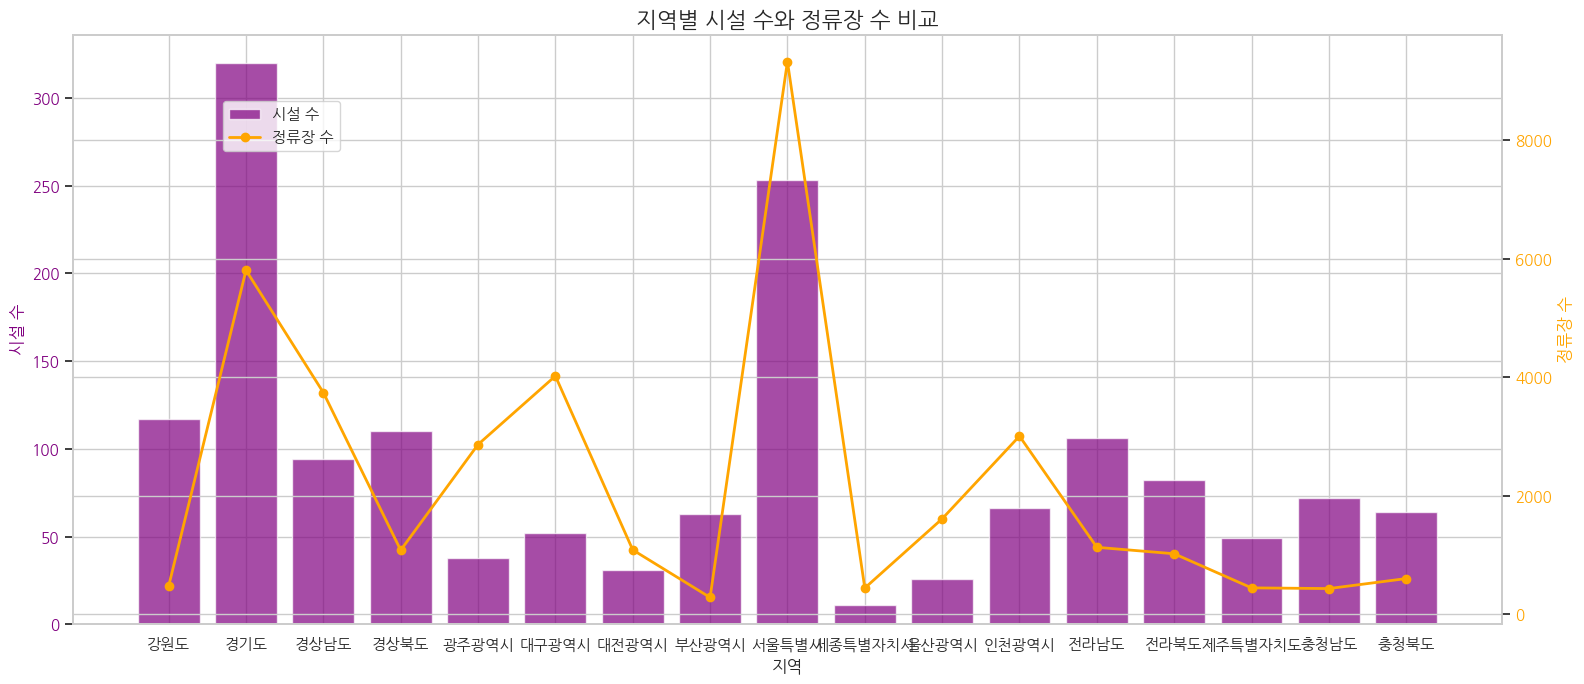

In [534]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 준비
regions = cultural_facilities_count_per_city['시도명']  # 지역 이름
facility_counts = cultural_facilities_count_per_city['시설수']  # 시설 수
station_counts = station_count_by_region['정류장 수']  # 정류장 수

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(16, 7))

# 첫 번째 Y축 (시설 수)
ax1.bar(regions, facility_counts, color='purple', alpha=0.7, label='시설 수')
ax1.set_ylabel('시설 수', fontsize=12, color='purple')
ax1.tick_params(axis='y', labelcolor='purple')

# 두 번째 Y축 (정류장 수)
ax2 = ax1.twinx()
ax2.plot(regions, station_counts, color='orange', marker='o', linestyle='-', linewidth=2, label='정류장 수')
ax2.set_ylabel('정류장 수', fontsize=12, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# X축 설정
ax1.set_xlabel('지역', fontsize=12)
plt.xticks(rotation=45, ha='right')

# 범례 추가
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9), bbox_transform=ax1.transAxes)

# 제목 설정
plt.title('지역별 시설 수와 정류장 수 비교', fontsize=16)

# 레이아웃 조정 및 표시
plt.tight_layout()
plt.show()

# 결론

가설 1. 도서 대출 수가 많은 지역은 도서관이 많을 것이다.
->

**도서관 접근성 개선**

1. 도서관 수 확대: 세종특별자치시의 사례에서 볼 수 있듯이, 도서관 수가 적더라도 도서관당 평균 대출 수가 높을 수 있습니다.
   따라서 단순히 도서관 수를 늘리는 것보다는 전략적으로 도서관을 배치하는 것이 중요합니다.
2. 도서관 위치 최적화: 상권 데이터와 도서관 위치를 분석하여 접근성이 높은 곳에 도서관을 설치해야 합니다.
  특히 부동산(0.480), 스포츠(0.445), 학문/교육(0.434) 업종과 도서관당 평균 대출 수 사이에 높은 상관관계가 나타났으므로, 이러한 업종이 밀집한 지역에 도서관을 설치하는 것이 효과적일 수 있습니다.

**도서관 서비스 개선**

1.	도서관 운영 시간 확대: 분석해보지 않았지만 평일, 토요일, 공휴일 운영 시간을 분석하여 이용자들의 니즈에 맞게 운영 시간을 조정하는 것이 도움이 될 수 있습니다.
2.	열람 좌석 수 증대: 도서관의 열람 좌석 수를 늘려 더 많은 이용자가 동시에 이용할 수 있도록 합니다.

**상권과 연계한 독서 문화 조성**

1.	복합 문화 공간 조성: 상권업종 중 ‘관광/여가/오락’이 도서관당 평균 대출 수와 양의 상관관계(0.420)를 보였고, 문화시설이 많은 지역이 도서 대출 수가 많은 모습을 보였습니다.도서관과 문화시설을 연계한 복합 공간을 조성합니다.
2.	교육 시설과의 연계: 학문/교육 업종과의 상관관계(0.434)를 고려하여, 학교나 학원과 연계한 독서 프로그램을 개발합니다.

### 사용 데이터
- 도담(2022 제1호).pdf
  - 지역별 도서 대출 수만 사용
- 전국도서관표준데이터.csv
  - https://www.data.go.kr/data/15013109/standard.do#tab_layer_grid
  - 2024-08-16까지의 데이터기준일자를 데이터가 있음
- 행정경계(시도)
  - 국토지리정보원 연속수치지형도 행정경계 데이터
  - https://www.vworld.kr/dtmk/dtmk_ntads_s002.do?searchKeyword=%EC%8B%9C%EB%8F%84&searchOrganization=&searchBrmCode=&searchTagList=&searchFrm=&pageIndex=1&gidmCd=&gidsCd=&sortType=00&svcCde=MK&dsId=30253&listPageIndex=1
- 국토교통부_전국 버스정류장 위치정보
  - https://www.data.go.kr/data/15067528/fileData.do#layer_data_infomation
- 디지털 문화역세권 (2022)
  - https://www.bigdata-culture.kr/bigdata/user/data_market/detail.do?id=b496a15e-81f5-44d4-b516-7a594f4abfd3
- 소상공인시장진흥공단_상가(상권)정보_20220630
  - https://www.data.go.kr/data/15083033/fileData.do
